In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Path to the fingerprint dataset
dataset_path = "C:/Users/vrlit/Downloads/fingerprint/SOCOFing"

# Load and preprocess the dataset
X = []
y = []

# Load real fingerprints
real_path = os.path.join(dataset_path, "Real")
for file in os.listdir(real_path)[:1000]:
    image = cv2.imread(os.path.join(real_path, file), cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))  # Resize to a consistent size
    X.append(image)
    y.append(1)  # Label 1 for real fingerprints

# Load altered fingerprints
altered_path = os.path.join(dataset_path, "Altered/Altered-Easy")
for file in os.listdir(altered_path)[:1000]:
    image = cv2.imread(os.path.join(altered_path, file), cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))  # Resize to a consistent size
    X.append(image)
    y.append(0)  # Label 0 for altered fingerprints

# Convert the data to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the image data
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape the data for CNN input
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Define the CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
sample_path = "Downloads/fingerprint/SOCOFing/Altered/Altered-Easy/150__M_Right_index_finger_Obl.BMP"
sample_image = cv2.imread(sample_path, cv2.IMREAD_GRAYSCALE)
sample_image = cv2.resize(sample_image, (128, 128))
sample_image = np.expand_dims(sample_image, axis=0)
sample_image = np.expand_dims(sample_image, axis=-1)
sample_image = sample_image.astype("float32") / 255.0

prediction = model.predict(sample_image)
if prediction > 0.5:
    print("Predicted class: Real fingerprint")
else:
    print("Predicted class: Altered fingerprint")


Epoch 1/10
50/50 [==============================] - 32s 573ms/step - loss: 0.6861 - accuracy: 0.5512 - val_loss: 0.6167 - val_accuracy: 0.6525
Epoch 2/10
50/50 [==============================] - 26s 529ms/step - loss: 0.6385 - accuracy: 0.6419 - val_loss: 0.5795 - val_accuracy: 0.7075
Epoch 3/10
50/50 [==============================] - 27s 536ms/step - loss: 0.5797 - accuracy: 0.6931 - val_loss: 0.5192 - val_accuracy: 0.7475
Epoch 4/10
50/50 [==============================] - 26s 527ms/step - loss: 0.5591 - accuracy: 0.7150 - val_loss: 0.4864 - val_accuracy: 0.7975
Epoch 5/10
50/50 [==============================] - 27s 532ms/step - loss: 0.5333 - accuracy: 0.7294 - val_loss: 0.5209 - val_accuracy: 0.7500
Epoch 6/10
50/50 [==============================] - 27s 535ms/step - loss: 0.4805 - accuracy: 0.7531 - val_loss: 0.4191 - val_accuracy: 0.8125
Epoch 7/10
50/50 [==============================] - 26s 516ms/step - loss: 0.4472 - accuracy: 0.7875 - val_loss: 0.4071 - val_accuracy: 0.8125

In [2]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Obtain the accuracy from the training history
accuracy = history.history['accuracy'][-1]
print("Accuracy: {:.2f}%".format(accuracy * 100))

Epoch 1/10
50/50 [==============================] - 25s 510ms/step - loss: 0.2961 - accuracy: 0.8612 - val_loss: 0.3104 - val_accuracy: 0.8650
Epoch 2/10
50/50 [==============================] - 27s 545ms/step - loss: 0.2681 - accuracy: 0.8831 - val_loss: 0.3469 - val_accuracy: 0.8575
Epoch 3/10
50/50 [==============================] - 25s 494ms/step - loss: 0.2316 - accuracy: 0.9075 - val_loss: 0.3104 - val_accuracy: 0.8575
Epoch 4/10
50/50 [==============================] - 24s 473ms/step - loss: 0.1981 - accuracy: 0.9137 - val_loss: 0.2962 - val_accuracy: 0.8725
Epoch 5/10
50/50 [==============================] - 24s 484ms/step - loss: 0.2075 - accuracy: 0.9081 - val_loss: 0.2619 - val_accuracy: 0.8825
Epoch 6/10
50/50 [==============================] - 25s 495ms/step - loss: 0.1620 - accuracy: 0.9350 - val_loss: 0.2682 - val_accuracy: 0.8875
Epoch 7/10
50/50 [==============================] - 23s 468ms/step - loss: 0.1390 - accuracy: 0.9369 - val_loss: 0.3948 - val_accuracy: 0.8575

13/13 [==============================] - 2s 130ms/step


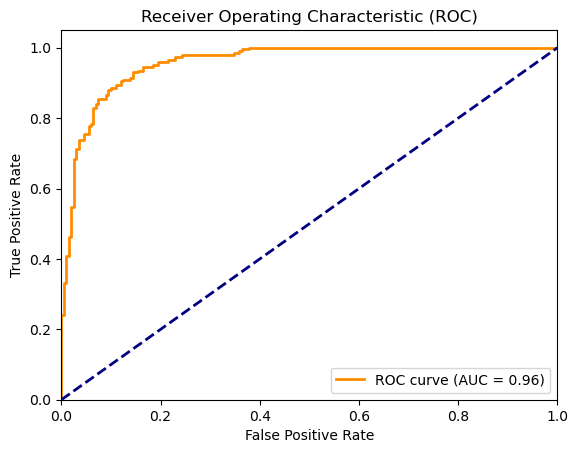

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the model's predicted probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
